In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
bikes = pd.read_csv('data/bikes_clean.csv')

### The trends in trip duration over different time periods

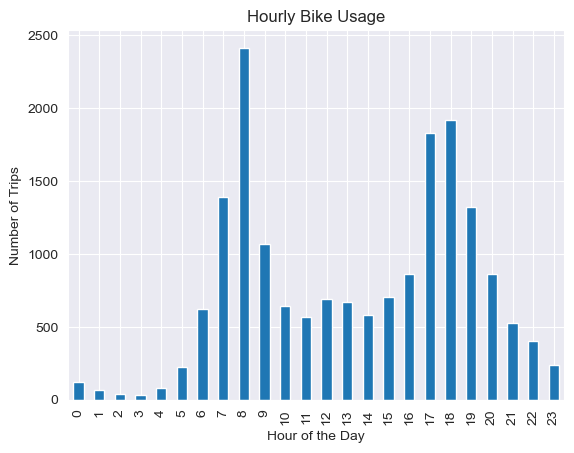

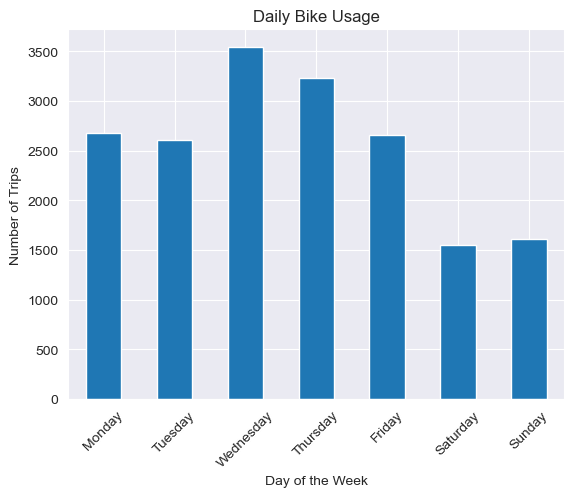

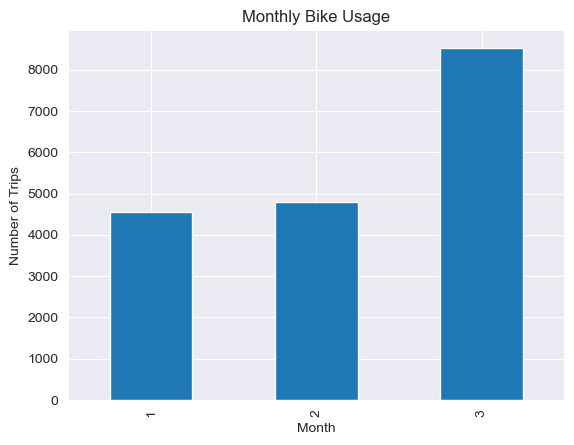

In [13]:
# Ensure 'Start Time' is in datetime format
bikes['Start Time'] = pd.to_datetime(bikes['Start Time'])

# Daily Analysis
# Group by hour and count the number of trips
hourly_usage = bikes.groupby(bikes['Start Time'].dt.hour).size()
hourly_usage.plot(kind='bar', xlabel='Hour of the Day', ylabel='Number of Trips', title='Hourly Bike Usage')
plt.show()

# Weekly Analysis
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Group by weekday and count the number of trips, then reindex to the correct order
# Use .day_name() to get the weekday names
daily_usage = bikes.groupby(bikes['Start Time'].dt.day_name()).size().reindex(weekday_order)
daily_usage.plot(kind='bar', xlabel='Day of the Week', ylabel='Number of Trips', title='Daily Bike Usage')
plt.xticks(rotation=45)
plt.show()

# Monthly Analysis
# Group by month and count the number of trips
monthly_usage = bikes.groupby(bikes['Start Time'].dt.month).size()
monthly_usage.plot(kind='bar', xlabel='Month', ylabel='Number of Trips', title='Monthly Bike Usage')
plt.show()

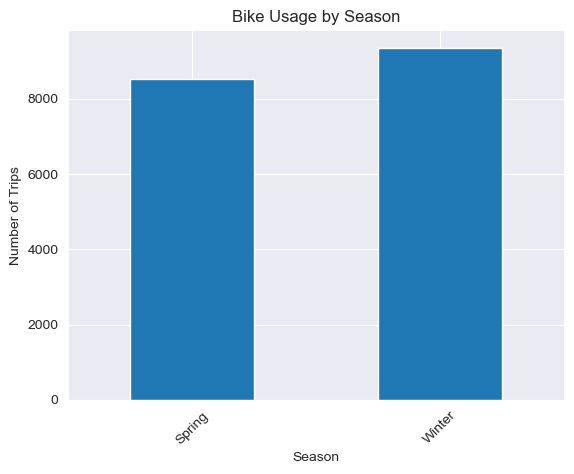

In [14]:
# Group data by season and count the number of trips
seasonal_usage = bikes.groupby('Season').size()

# Plotting
seasonal_usage.plot(kind='bar', xlabel='Season', ylabel='Number of Trips', title='Bike Usage by Season')
plt.xticks(rotation=45)
plt.show()

### Station Analysis (Start and End stations) (Most and least popular routes)

Most Popular Start Station: Grove St PATH
Most Popular End Station: Grove St PATH

Top 5 Most Frequently Taken Routes:
Start Station Name  End Station Name
Hamilton Park       Grove St PATH       494
Morris Canal        Exchange Place      424
Dixon Mills         Grove St PATH       346
Exchange Place      Morris Canal        346
Grove St PATH       Hamilton Park       329
dtype: int64

Top 5 Least Frequently Taken Routes:
Start Station Name       End Station Name       
Dey St                   Pershing Field             1
Newport PATH             JC Medical Center          1
Communipaw & Berry Lane  Hilltop                    1
                         Communipaw & Berry Lane    1
West Side Light Rail     Union St                   1
dtype: int64


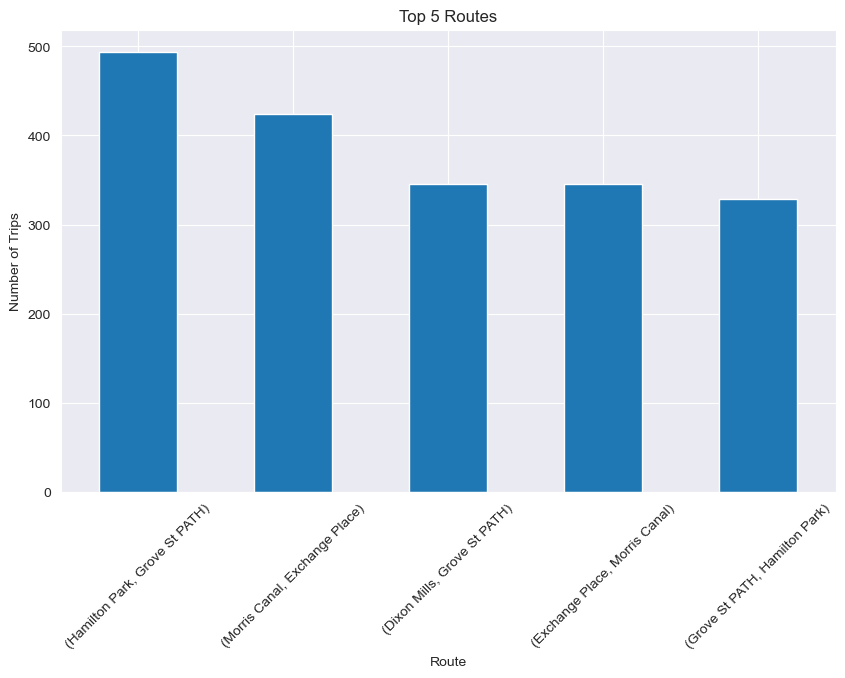

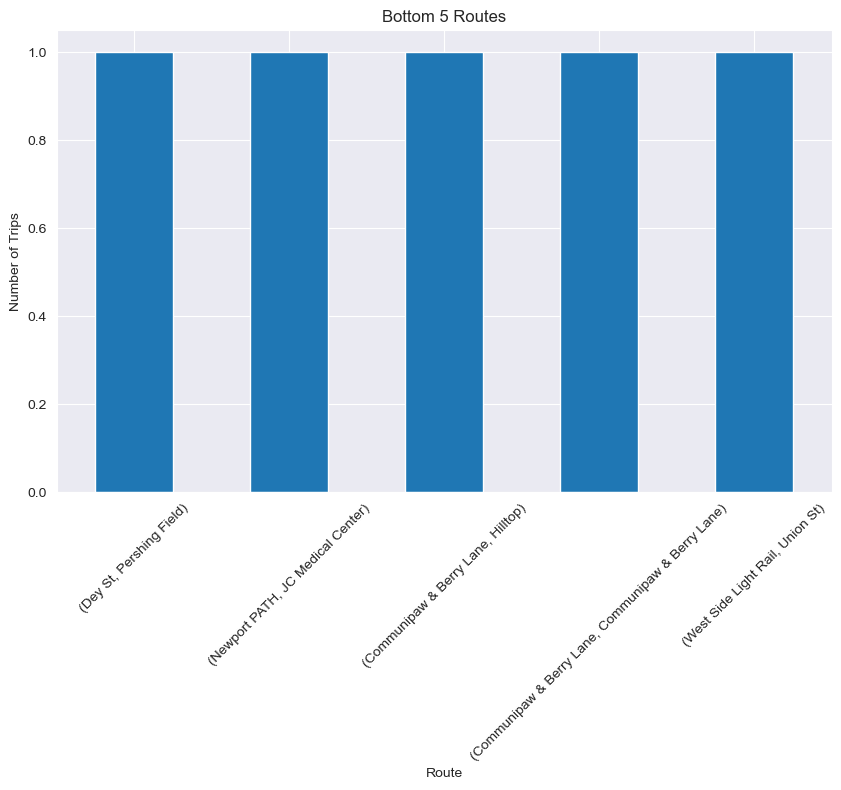

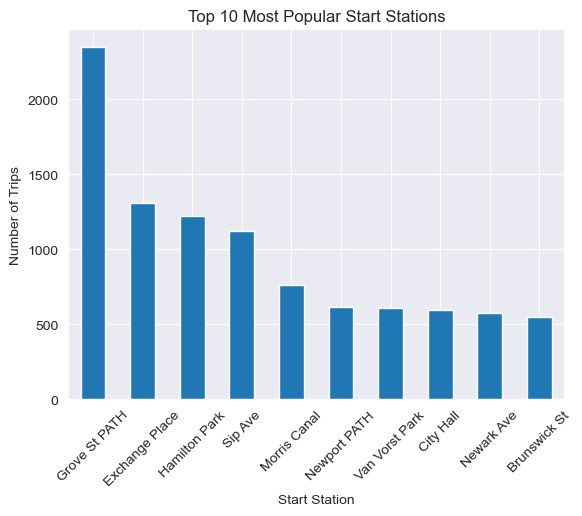

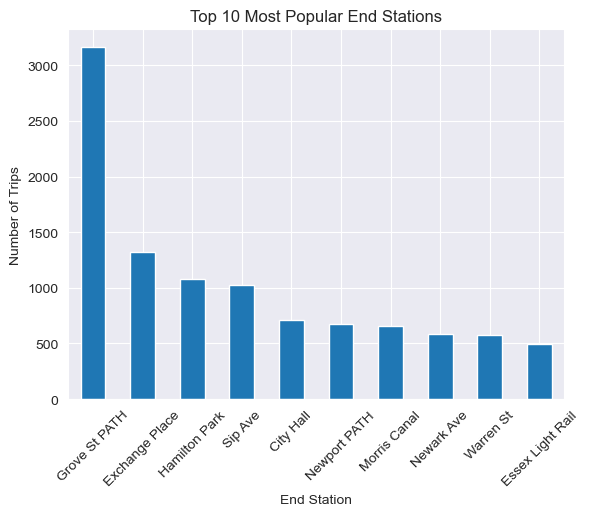

In [15]:
# Count the frequency of start stations
start_station_counts = bikes['Start Station Name'].value_counts()

# Count the frequency of end stations
end_station_counts = bikes['End Station Name'].value_counts()

# Find the most popular start and end stations
most_popular_start = start_station_counts.idxmax()
most_popular_end = end_station_counts.idxmax()

print("Most Popular Start Station:", most_popular_start)
print("Most Popular End Station:", most_popular_end)

# Calculate route frequencies by grouping by start and end stations
route_counts = bikes.groupby(['Start Station Name', 'End Station Name']).size().sort_values(ascending=False)

# Display the top 5 most frequently taken routes
print("\nTop 5 Most Frequently Taken Routes:")
print(route_counts.head())

# Display the top 5 least frequently taken routes
print("\nTop 5 Least Frequently Taken Routes:")
print(route_counts.tail())

# Plotting
# Top 5 Routes
plt.figure(figsize=(10, 6))
route_counts.head(5).plot(kind='bar', xlabel='Route', ylabel='Number of Trips', title='Top 5 Routes')
plt.xticks(rotation=45)
plt.show()

# Bottom 5 Routes
plt.figure(figsize=(10, 6))
route_counts.tail(5).plot(kind='bar', xlabel='Route', ylabel='Number of Trips', title='Bottom 5 Routes')
plt.xticks(rotation=45)
plt.show()

# Plot the top 10 most popular start stations
start_station_counts.head(10).plot(kind='bar', xlabel='Start Station', ylabel='Number of Trips', title='Top 10 Most Popular Start Stations')
plt.xticks(rotation=45)
plt.show()

# Plot the top 10 most popular end stations
end_station_counts.head(10).plot(kind='bar', xlabel='End Station', ylabel='Number of Trips', title='Top 10 Most Popular End Stations')
plt.xticks(rotation=45)
plt.show()

### The trends in trip duration over different user types

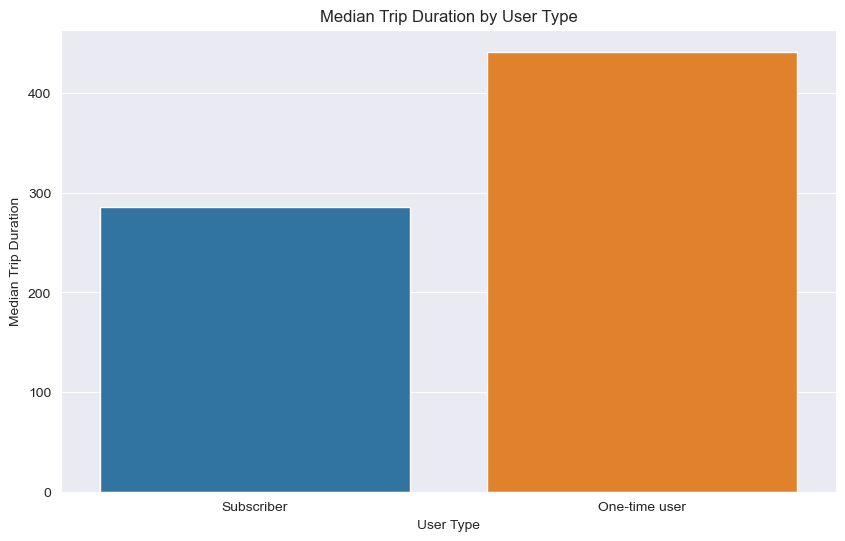

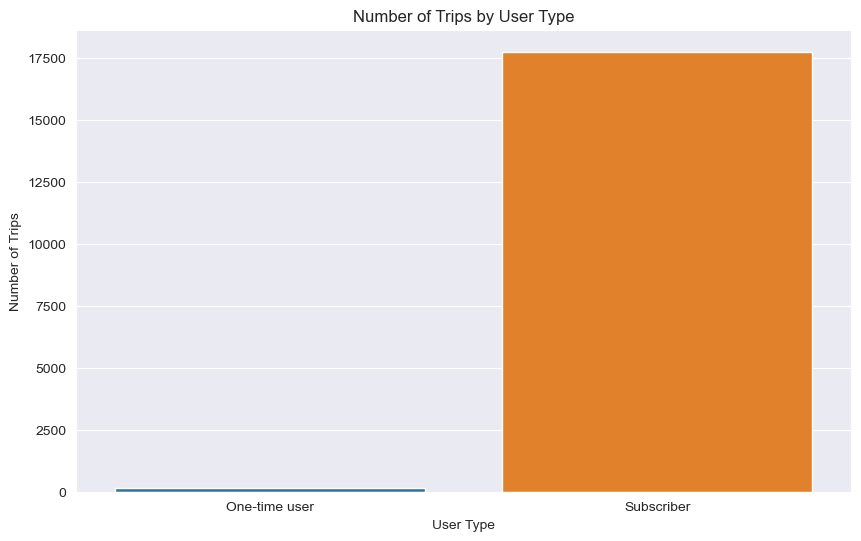

In [16]:
# Group data by user type
user_type_groups = bikes.groupby('User Type')

# Calculate trip duration statistics for each user type
trip_duration_stats = user_type_groups['Trip Duration'].describe()

# Count the number of trips for each user type
trip_count_by_user_type = user_type_groups.size().reset_index(name='Count')

# Plotting
# Trip Duration Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='User Type', y='Trip Duration', data=bikes, estimator=pd.Series.median, errorbar=None)
plt.xlabel('User Type')
plt.ylabel('Median Trip Duration')
plt.title('Median Trip Duration by User Type')
plt.show()

# Trip Frequency Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='User Type', y='Count', data=trip_count_by_user_type)
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by User Type')
plt.show()

### The trends in trip duration over different age groups

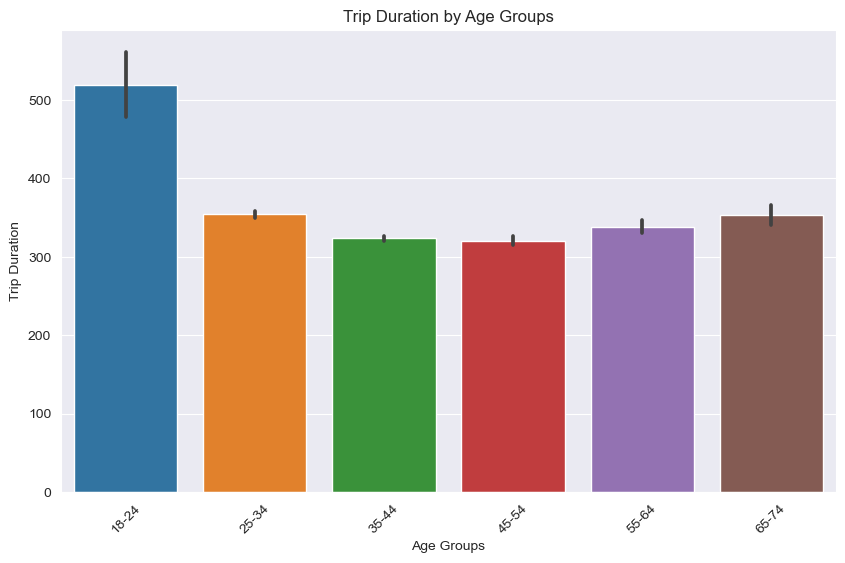

In [17]:
# Group data by age groups
age_group_groups = bikes.groupby('Age Groups')

# Calculate trip duration statistics for each age group
trip_duration_stats = age_group_groups['Trip Duration'].describe()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Groups', y='Trip Duration', data=bikes, order=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74'])
plt.xlabel('Age Groups')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Age Groups')
plt.xticks(rotation=45)
plt.show()

### The trends in trip duration over different seasons

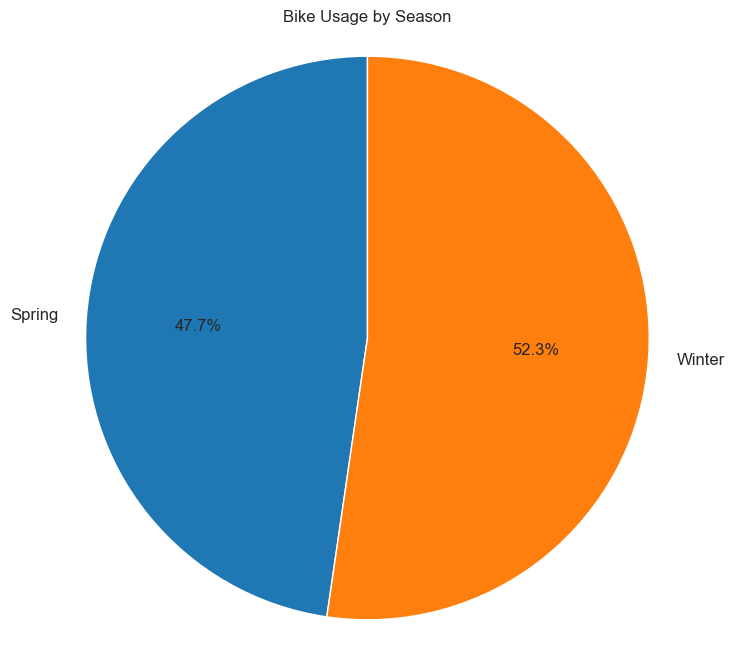

In [18]:
# Group data by season and calculate average temperature
seasonal_temperature = bikes.groupby('Season')['Temperature'].mean().reset_index()

# Group data by season and calculate bike usage metrics (e.g., total number of trips)
seasonal_usage = bikes.groupby('Season').size().reset_index(name='Total Trips')

# Calculate the percentage of total trips for each season
seasonal_usage['Percentage'] = seasonal_usage['Total Trips'] / seasonal_usage['Total Trips'].sum() * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(seasonal_usage['Percentage'], labels=seasonal_usage['Season'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Bike Usage by Season')
plt.axis('equal')
plt.show()

### The trends in trip duration over different months

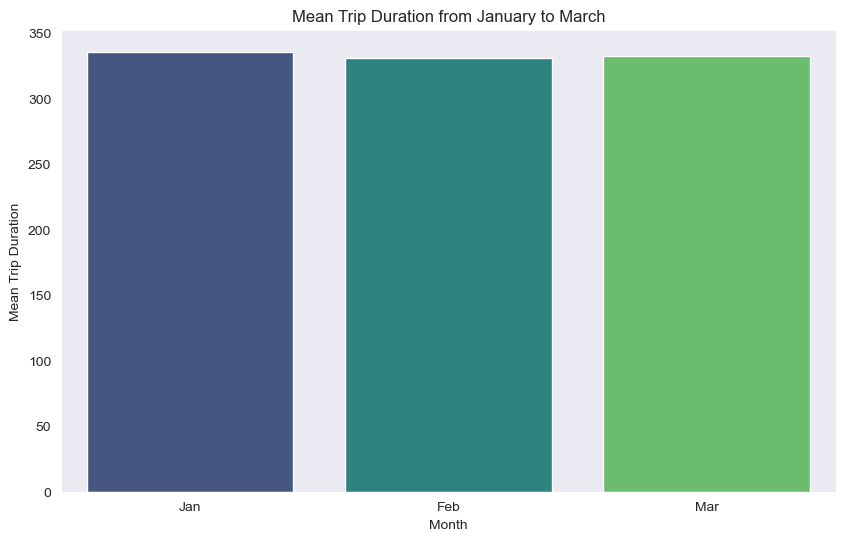

In [22]:
# Filter data for January to March
jan_to_mar_data = bikes[bikes['Month'].isin([1, 2, 3])]

# Group data by month and calculate mean trip duration
monthly_trip_duration_mean = jan_to_mar_data.groupby('Month')['Trip Duration'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trip_duration_mean, x='Month', y='Trip Duration', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Mean Trip Duration')
plt.title('Mean Trip Duration from January to March')
plt.xticks(ticks=[0, 1, 2], labels=['Jan', 'Feb', 'Mar'])
plt.grid(axis='y')
plt.show()

### The distribution of trip durations

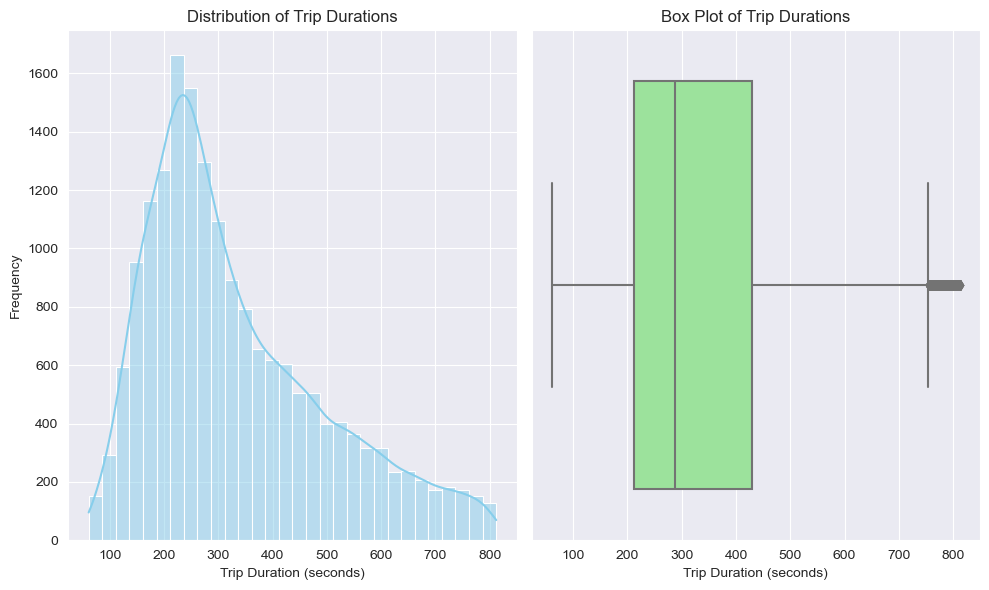

In [23]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(bikes['Trip Duration'], bins=30, kde=True, color='skyblue')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=bikes['Trip Duration'], color='lightgreen')
plt.xlabel('Trip Duration (seconds)')
plt.title('Box Plot of Trip Durations')

plt.tight_layout()
plt.show()